# Random Forest Classifier

## Importation des Bibliothèques et du Dataset



In [10]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Pou arbre
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

## Division des données 

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modele.

D'abord assigner toutes les valeurs sauf Heart diseases dans x et Heart diseases dans y.

In [11]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

Puis je vais diviser mes données de la manière suivante : 

80% pour l'entrainement et 20% pour le test.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Entrainement du modèle et Prédiction

On va ensuite entrainer notre modèle sur les données d'entrainement et ressortir une note de précision.

In [13]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.875


## Visualisation des résultats

A l'aide d'un arbres de décision, on va visualiser les résultats de notre modèle dans un premier temps.

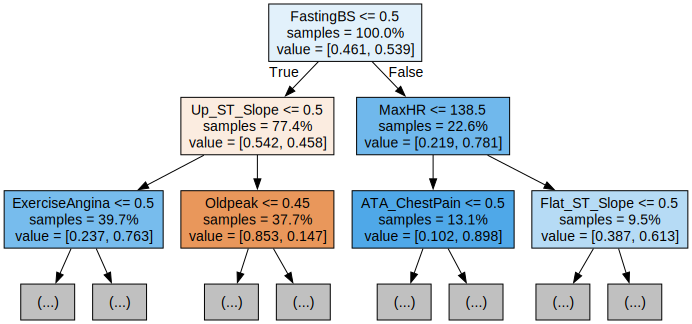

In [14]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=x.columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### Sous partie : Paramètres du modèle

Dans le cas d'un Random Forest Classifier, on peut modifier plusieurs paramètres pour améliorer la précision de notre modèle.

On va donc essayer de modifier les paramètres afin d'obtenir la meilleure précision possible. Pour cela on va utiliser la fonction GridSearchCV de la bibliothèque sklearn qui va nous permettre de tester plusieurs combinaisons de paramètres et de ressortir la plus optimale.

In [15]:
param_dist = {'n_estimators' : randint(5,500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=5)
rand_search.fit(x_train, y_train)
best_rf = rand_search.best_estimator_
print("Meilleurs Parametres: ", rand_search.best_params_)

Meilleurs Parametres:  {'max_depth': 4, 'n_estimators': 290}


On va ensuite afficher ensuite l'exactitude, la precision et le recall de notre modele. 

Et enfin on va afficher la matrice de confusion de notre modèle.

Accuracy: 0.8586956521739131
Precision: 0.8981481481481481
Recall: 0.8660714285714286


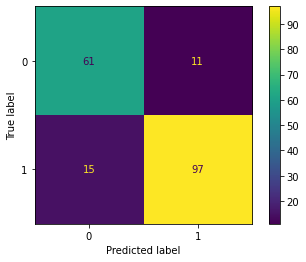

In [16]:
y_pred = best_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

## Teste de notre modèle

### Fonctions de test

On va tester avec des patients de test pour voir si notre modèle est capable de prédire correctement les maladies cardiaques. Pour cela on va utiliser les fonctions suivantes :

In [17]:
def tester_patient(liste_colonne, patient):
    df = pd.DataFrame(patient, columns=liste_colonne)
    prediction = best_rf.predict(df)
    if prediction == 1:
        print("Le patient est malade")
    else:
        print("Le patient est en bonne santé")

def tester_plusieurs_patients(liste_colonne, patients):
    index = 1
    for patient in patients:
        print(f"Patient {index}")
        tester_patient(liste_colonne, patient)
        print("\n")
        index += 1

### Données de test

Avec les fonctions definies précédemment, on va tester notre modèle avec les données suivantes :

In [18]:
#test 

liste_colonnes = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 
                  'MaxHR', 'ExerciseAngina', 'Oldpeak', 'TA_ChestPain', 
                  'ATA_ChestPain', 'NAP_ChestPain', 'ASY_ChestPain', 
                  'Normal_RestingECG', 'ST_RestingECG', 'LVH_RestingECG', 
                  'Up_ST_Slope', 'Flat_ST_Slope', 'Down_ST_Slope']


patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #1
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911

liste_patients = [patient, patient2, patient3, patient4]
tester_plusieurs_patients(liste_colonnes, liste_patients)



Patient 1
Le patient est en bonne santé


Patient 2
Le patient est en bonne santé


Patient 3
Le patient est malade


Patient 4
Le patient est malade




## Conclusion

ecrire la conclusion.